<a href="https://colab.research.google.com/github/praveen311094/Praveen-Projects/blob/main/Capstone_Project_Bank_Marketing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRODUCTION OF DATASET 

The DataSet is taken from the Bank Marketing campaigns (phone calls) of a Portuguese banking institution

**BUSINESS PROBLEM Statement:** To find out the factors which will help bank to run efficient marketing campaigns and make calls to those customers who are most interested to subscribe for term deposits offered by the bank.

**AIM of the Project**

The Aim is to predict if the client will subscribe a term deposit and identify factors that may improve the bank’s marketing strategies to attract more customers to get a term deposit.        

**Attributes Explanation**

**Input variables:**
**age, job, marital, education** are self explanatory

**default**: Does the customer have credit in default

**Balance**: Balance of the customer

**housing**: Does the customer have a housing loan

**loan**: Does the customer have a personal loan

**Related with the last contact of the current campaign:**

**Contact**: contact communication type

**Month**: last contact month of year ("jan", "feb", "mar", ..., "nov", "dec")

**Duration**: last contact duration, in seconds.
*Important note:*  this attribute highly affects the output target (e.g., if duration=0 then y="no").


**Other attributes:**

**Campaign**: Number of contacts performed during this campaign and for this client includes last contact

**pdays**: Number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)

**Previous**: number of contacts performed before this campaign and for this client

**poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

**Outcome variable(y)**- has the client subscribed to a term deposit? ("yes","no")

**Importing Libraries**

In [2]:
# Importing necessary libraries
import numpy as np  # Mathematical calculations, extra faster functions
import pandas as pd # For data loading and manipulation
import matplotlib.pyplot as plt  # Visualization tool (Can create complex custom charts) 
import seaborn as sns # Visualization tool (in-build high quality charts)
import warnings
warnings.filterwarnings('ignore')  # This method will ignore all warnings.

# Basic Exploration

In [270]:
bank_full=pd.read_csv('bank-full.csv',sep=';') # reading the bankfull dataset using pandas and use separater

In [271]:
bank_full.shape # to check rows and columns

(45211, 17)

In [272]:
bank=pd.read_csv('bank.csv',sep=';') # reading the bank dataset using pandas and use separater

In [273]:
bank.shape # to check rows and columns in randomly selected dataset

(4521, 17)

*Merging bank_full and bank datasets into a single dataframe and to perform further analysis*

In [274]:
bank_marketing=pd.concat([bank_full,bank],ignore_index=True) # merging both datasets

In [275]:
bank_marketing.shape # View dimensionality of the dataset

(49732, 17)

In [276]:
bank_marketing.head() # shows top 5 rows in dataframe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [277]:
bank_marketing.tail() # shows bottom 5 rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
49731,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [278]:
bank_marketing.info() # to check dataset summary.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [279]:
bank_marketing.describe() # Provides descriptive information about the data.

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Data Preparation

In [280]:
bank_marketing = bank_marketing.drop_duplicates() # dropping the dublicates from the bank_marketing dataset

In [281]:
bank_marketing.shape # after removing duplicates shape

(45211, 17)

Merging both datasets will only lead to duplication so bank dataset is derived from bank_full dataset so our main dataframe bank_marketing has 45211 rows and 17 columns.

In [282]:
bm=bank_marketing.copy() # creating a copy of main dataframe into new one 'bm'

# Variable Understanding

In [283]:
bm.info() # for getting information of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


If we observe categorical columns datatype is showing object which is incorrect so let's change them below...

In [284]:
col = ['job','marital','education','default','housing','loan','contact','month','poutcome','y'] # columns for conversion which are showing as object dataypes
bm[col]=bm[col].astype('category') 
bm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  y          45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 3.2 MB


**Obervation :**

objects variables = 10

numericals variables = 7

In [285]:
bm.nunique() # getting unique values

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


*   There is no feature with unique value

In [286]:
bm.isnull().sum() # to check null values

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [287]:
bm.isna() # to detect missing values in dataframe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [288]:
bm.isna().sum() # missing values count column wise

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

*We have zero missing and zero null values in dataframe*

In [289]:
bm.describe() # shows the numerical columns with statistical data

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


If we observe the data standard deviation is varying high to the mean value.
Difference between 75th percentile and max value is very high which indicates skewness.

In [290]:
bm.describe(include='category')  # shows the categorical columns with statistical data

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


If we see top frequency is high in factors like default,poutcome and y which shows skewness in the data.

In [291]:
bm.describe(include='all') # get dataframe's descriptive statistics for all columns

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


**Categorical Variables:**                   
1. Job
2. Marital
3. Education
4. Default
5. Housing
6. Loan
7. Contact
8. month
9. poutcome
10. y

---
**Numerical Variables:**
1. Age
2. Balance
3. Duration
4. Campaign
5. Pdays
6. Previous
7. day




# Data Preparation

-> In Data Preparation, we need to check if there are any unwanted columns, incorrect column names or can we create any new variable.

Some of the columns are not properly named so let's name for better understanding ahead in analysis.

**Renaming Columns**

In [292]:
#bm.columns # to show column name in dataframe

bm = bm.rename(columns = {'default':"Credit_Status","housing":"Housing_loan","loan":"Personal_loan",
                     "contact":"Communication_type","month":"Contact_month","duration":"Call_duration",
                     "campaign":"CurrentCampaign_Contacts","pdays":"previousCampaign_lastcontacts",
                     "previous":"BeforeCampaign_contacts","poutcome":"PreviousOutcome","y":"Term_deposit"})
bm.columns

Index(['age', 'job', 'marital', 'education', 'Credit_Status', 'balance',
       'Housing_loan', 'Personal_loan', 'Communication_type', 'day',
       'Contact_month', 'Call_duration', 'CurrentCampaign_Contacts',
       'previousCampaign_lastcontacts', 'BeforeCampaign_contacts',
       'PreviousOutcome', 'Term_deposit'],
      dtype='object')

# Variable Relationship

**Univariate Analysis**

**Exploration of Categorical Features**

In [293]:
categorical_features=[feature for feature in bm.columns if ((bm[feature].dtypes=='category'))]
categorical_features

['job',
 'marital',
 'education',
 'Credit_Status',
 'Housing_loan',
 'Personal_loan',
 'Communication_type',
 'Contact_month',
 'PreviousOutcome',
 'Term_deposit']

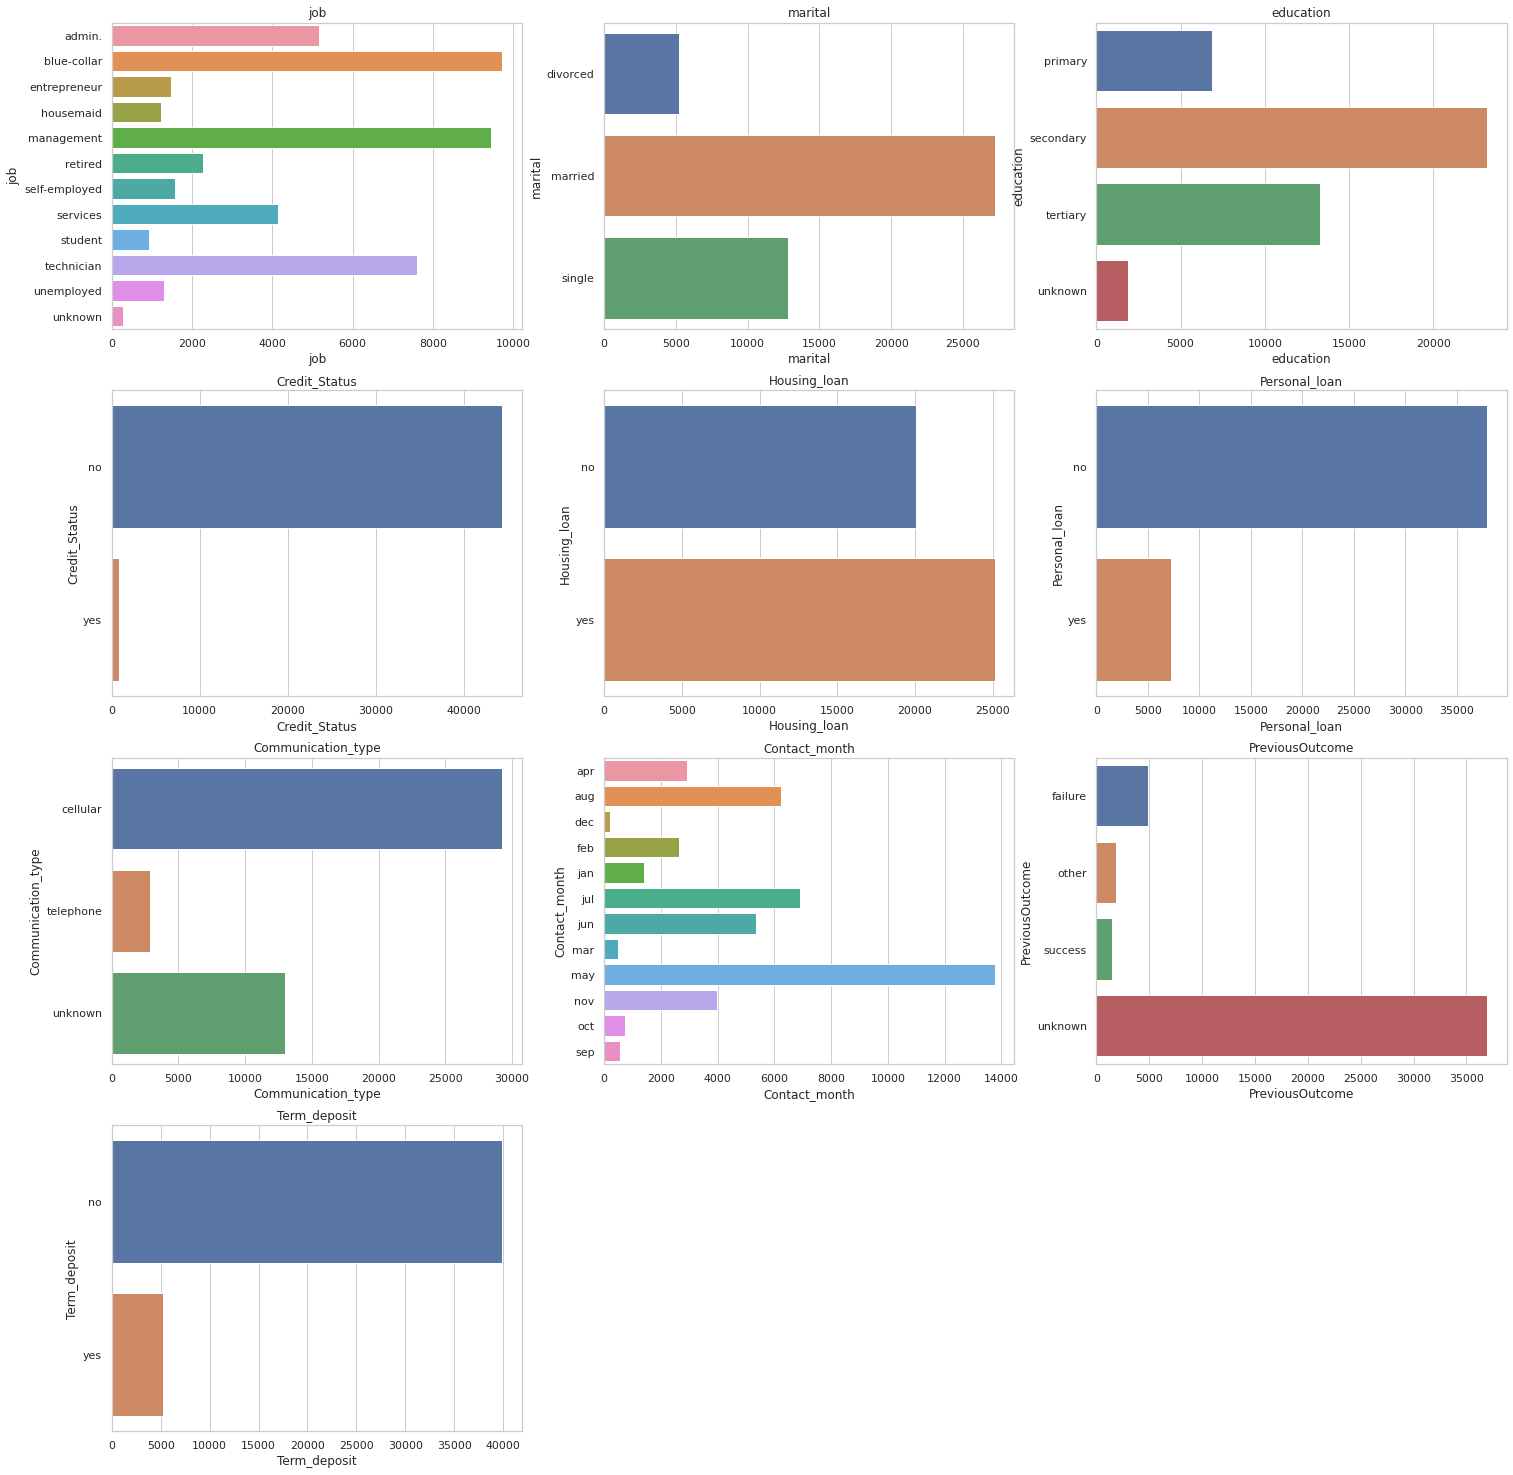

In [295]:
# To plot all categorical features in a single plot

plt.figure(figsize=(25,80), facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
  ax= plt.subplot(12,3,plotnumber)
  sns.countplot(y=categorical_feature,data=bm)
  plt.xlabel(categorical_feature)
  plt.title(categorical_feature)
  plotnumber+=1
plt.show()

**Explanation:**


---


*Key Observations from Univariate Analysis From Categorical Columns*


We can identify Client who are **married** are contacted more by the bank and divorced Client have been contacted least followed by single category.

In **Job** Factor, we can observe that Client with blue-collar,management and technician jobs have been contacted more by the bank which are more than 6k

If we observe the plot, **secondary education** category is contacted most.

->>>The plot shows the client with **default credit value **status as ‘no’ are the most who have been contacted by the bank for the deposits. Client with default status ‘yes’ have not been contacted by the bank at all.

**Housing loan** category clients are more in number which may help in finding relationships with target variable

**personal loan** category shows nearly 7K customers are contacted.


The **Clients who are last contacted** are majorly in the month of may followed by july and august. Bank has least contacted the clients in the december followed by march,september and october.



The Plot on **contact communication type** explains bank has contacted clients mostly through cellular communication and least contacted through telephone communication. Also, there are nearly 14k clients where bank is unable to reach customers.


->>>The Plot on **outcome of the previous marketing campaign** contains 37K unknown values which is more imbalanced.

So removing columns from the dataset includes-> Credit Status, Outcome of previous marketing compaign which introude bias in analysis.

Text(0.5, 0.98, 'Histogram plot for Numerical Variables')

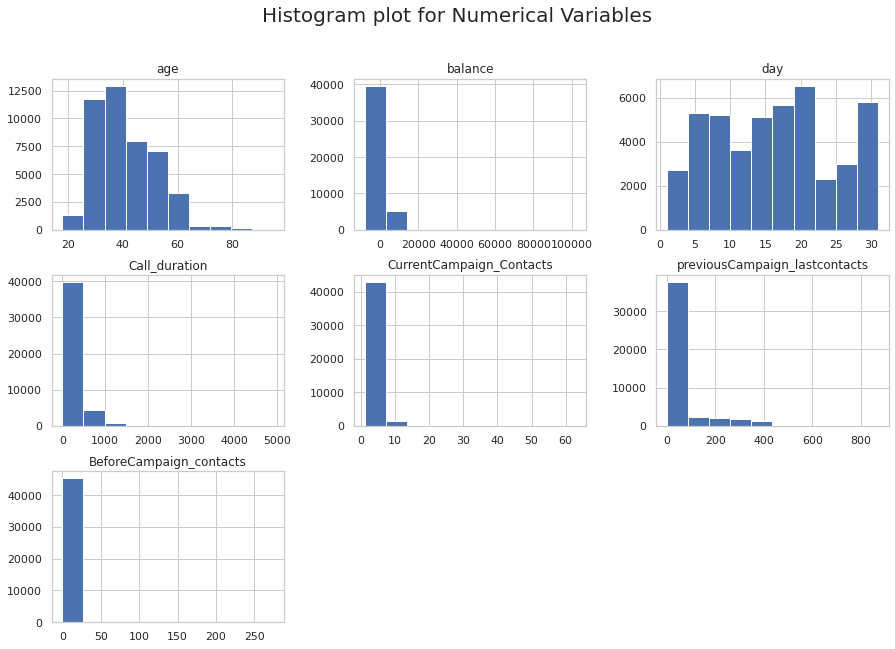

In [296]:
bm.hist(figsize = (15,10)) # Histogram plot for Numerical Columns
plt.suptitle("Histogram plot for Numerical Variables",fontsize=20) # title of the Histogram plot

**Explanation:**


---


**By looking at the histogram subplots we can find analysis as below:**

**Age**- Moderately skewed towards right

**balance** - Positively Skewed or right skewed

**day**: Symmetrical

**duration** - Positively Skewed or right skewed

**CurrentCampaign Contacts** - Positively Skewed or right skewed

**PreviousCampaign lastcontact** - Positively Skewed or right skewed

**BeforeCampaign_contact** - Positively Skewed or right skewed

In [297]:
bm.skew() # to find skewness value of all columns in dataset

age                               0.684818
balance                           8.360308
day                               0.093079
Call_duration                     3.144318
CurrentCampaign_Contacts          4.898650
previousCampaign_lastcontacts     2.615715
BeforeCampaign_contacts          41.846454
dtype: float64

# Skewness

- If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
- If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.
- If skewness is less than -1 or greater than 1, the distribution is highly skewed.

*   Now we can clearly check that balance, Call_duration, campaign, pdays and previous columns are highly skewed. 

*   Only Age variable is moderately skewed.

*   day last contacted to the client is symmetrical



In [299]:
bm.kurt() # Kurtosis of the variable

age                                 0.319570
balance                           140.751547
day                                -1.059897
Call_duration                      18.153915
CurrentCampaign_Contacts           39.249651
previousCampaign_lastcontacts       6.935195
BeforeCampaign_contacts          4506.860660
dtype: float64

**Kurtosis **


---


Lets walk you through what it this exactly and how it is going to effect for analysis and introduce problems

**Kurtosis** relates to the degree of presence of outliers in the distribution. 

In finance, kurtosis is used as a measure of financial risk. A large kurtosis indicates high level of risk for an investment because it indicates that there are high probabilities of extremely large and extremely small returns. Also, a small kurtosis signals a moderate level of risk because the chances of extreme returns are relatively low.

From skewness and Kurtosis we got to understand that balance, duration, campaign, pdays, previous columns are highyly skewed and they introduce bias to the model.

In [ ]:
# bm.drop(columns = ['age_log', 'age_sqrt'], inplace = True)

In [300]:
bm.columns

Index(['age', 'job', 'marital', 'education', 'Credit_Status', 'balance',
       'Housing_loan', 'Personal_loan', 'Communication_type', 'day',
       'Contact_month', 'Call_duration', 'CurrentCampaign_Contacts',
       'previousCampaign_lastcontacts', 'BeforeCampaign_contacts',
       'PreviousOutcome', 'Term_deposit'],
      dtype='object')

Age is positively skewed towards right so lets do some analysis with help of histogram

**Finding Relations between Independent and Dependant Variables and its effect on target column.**

*Scatter Plots and Bubble Plots are more suitable in finding Relationships where can use more than 3 variables.*

*On X and Y axes we use numerical columns where on hue, style, size includes categorical.*

**Independent Variables**


---


Age\
job\
marital\
education\
Balance\
Communication_type\
Contact_month\
Call_duration\
day of Contact\
PresentCampaign_contacts_made\
previousCampaign_lastcontacted\
BeforeCampaign_contact



**Dependent Variables**


---


Term_deposit\
Credit_Status\
Housing_Loan\
Personal_Loan\
PreviousOutcome

**Transforming - Encoding:**

*Encoding categorical features:* encodes categorical variables into 1s and 0s (yes and no become 1 and 0).

To find correlation for Credit_Status, Housing_loan, Personal_loan against Term_deposit how they effecting.

In [97]:
# a. Encoding categorical features.
# bm1['Credit_Status'] = bm1['Credit_Status'].map({'yes': 1, 'no': 0})
# bm1['Housing_loan'] = bm1['Housing_loan'].map({'yes': 1, 'no': 0})
# bm1['Personal_loan'] = bm1['Personal_loan'].map({'yes': 1, 'no': 0})
# bm1

,age,job,marital,education,Credit_Status,balance,Housing_loan,Personal_loan,Communication_type,day,Contact_month,Call_duration,PresentCampaign_contacts_made,previousCampaign_lastcontacted,BeforeCampaign_contact,PreviousOutcome,Term_deposit
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [301]:
bm1=bm.copy()
bm1['Term_deposit'].replace(['no', 'yes'],
                        [0, 1], inplace=True)
bm1.value_counts('Term_deposit')

Term_deposit
0    39922
1     5289
dtype: int64

In [302]:
# col = ['Credit_Status', 'Housing_loan', 'Personal_loan'] # columns for conversion which are showing as object dataypes
# bm1[col]=bm1[col].astype('int') 
bm1.dtypes

age                                 int64
job                              category
marital                          category
education                        category
Credit_Status                    category
balance                             int64
Housing_loan                     category
Personal_loan                    category
Communication_type               category
day                                 int64
Contact_month                    category
Call_duration                       int64
CurrentCampaign_Contacts            int64
previousCampaign_lastcontacts       int64
BeforeCampaign_contacts             int64
PreviousOutcome                  category
Term_deposit                        int64
dtype: object

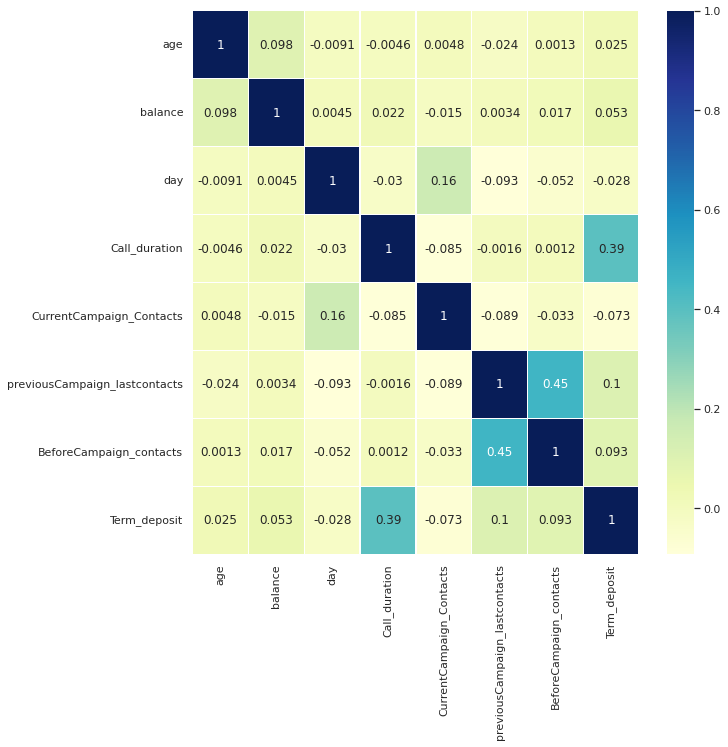

In [303]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(bm1.corr(),annot=True,ax=ax, linewidth=0.5,cmap="YlGnBu")
plt.show()

**Explanation:**


---


From the Correlation among the numerical columns we can observe that call duration is correlated with term deposit whereas balance, previousCampaign_lastcontacted, BeforeCampaign_contact are also nearly correlated. But after performing analysis it is considerable to drop columns to make a better model.

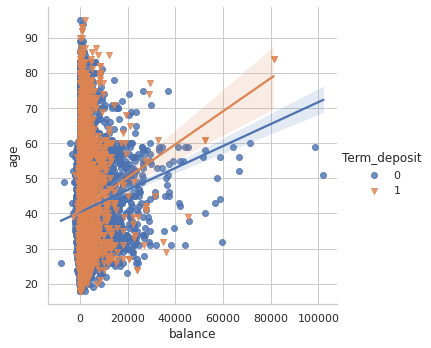

In [304]:
sns.set_style('whitegrid') 
sns.lmplot(x ='balance', y ='age', data = bm1, # limeplot
           hue ='Term_deposit', markers =['o', 'v'])

**Explanation:**


---
If we see the plot age has positive linear correlation with balance and are important factors in analysis going further.


In [309]:
bm.columns

Index(['age', 'job', 'marital', 'education', 'Credit_Status', 'balance',
       'Housing_loan', 'Personal_loan', 'Communication_type', 'day',
       'Contact_month', 'Call_duration', 'CurrentCampaign_Contacts',
       'previousCampaign_lastcontacts', 'BeforeCampaign_contacts',
       'PreviousOutcome', 'Term_deposit'],
      dtype='object')

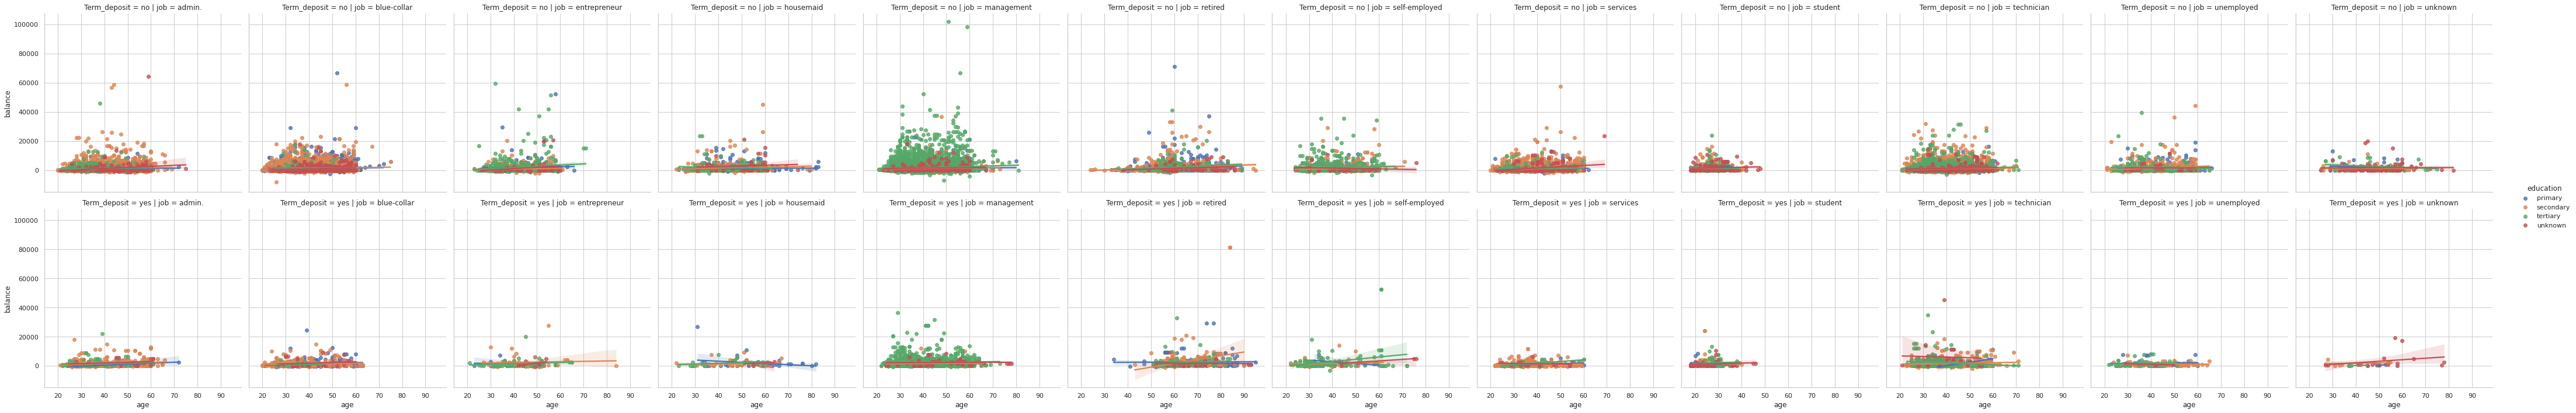

In [310]:
sns.lmplot(x ='age', y ='balance', data = bm,  
           col ='job', row ='Term_deposit', hue ='education')

**Explanation:**

The Plot shows important observations where entrepreneur, retired, self-employed job categories are positively linear to the target variable-term_deposit.

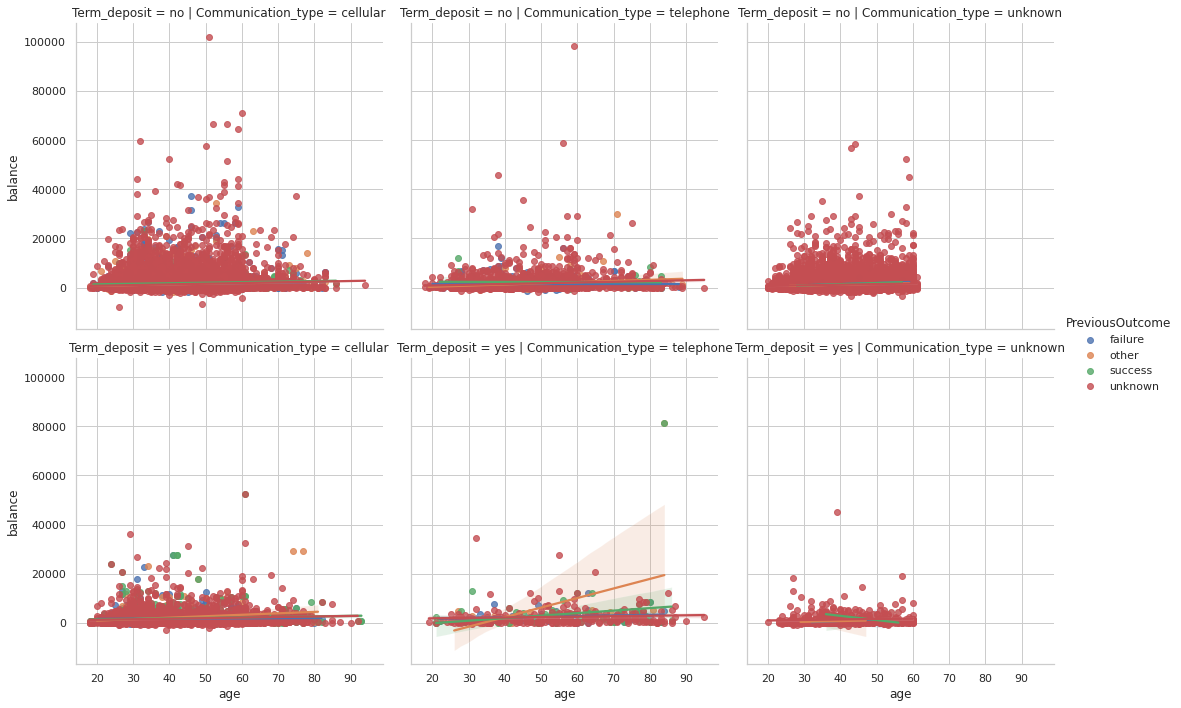

In [311]:
sns.lmplot(x ='age', y ='balance', data = bm,  
           col ='Communication_type', row ='Term_deposit', hue ='PreviousOutcome')

**Explanation:**


---
The Plot shows the term deposit in communication type mode where age and balance are positively linear and success in the outcome of previous campaign




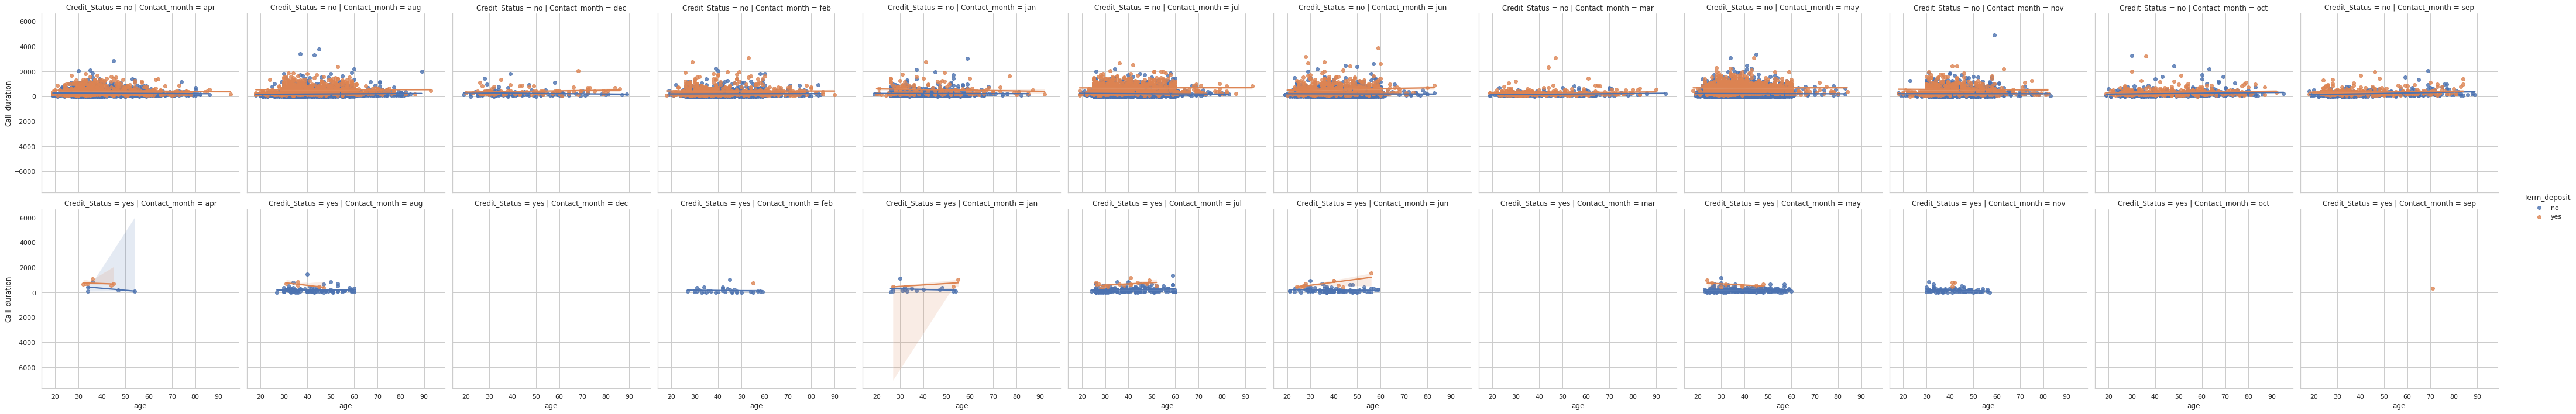

In [197]:
# sns.lmplot(x ='age', y ='Call_duration', data = bm,  
#            col ='Contact_month', row ='Credit_Status', hue ='Term_deposit')

**Explanation:**


---
The Call_duration is more linear to the age in the months of jan, june and july where credit_status is true.


**Dropping Columns**

In [313]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            45211 non-null  int64   
 1   job                            45211 non-null  category
 2   marital                        45211 non-null  category
 3   education                      45211 non-null  category
 4   Credit_Status                  45211 non-null  category
 5   balance                        45211 non-null  int64   
 6   Housing_loan                   45211 non-null  category
 7   Personal_loan                  45211 non-null  category
 8   Communication_type             45211 non-null  category
 9   day                            45211 non-null  int64   
 10  Contact_month                  45211 non-null  category
 11  Call_duration                  45211 non-null  int64   
 12  CurrentCampaign_Contacts       4

In [321]:
# bm1 = bm.drop(columns = ["previousCampaign_lastcontacts","BeforeCampaign_contacts","CurrentCampaign_Contacts","day"], inplace = True)
bm1.columns
# bm1=bm.copy()

Index(['age', 'job', 'marital', 'education', 'Credit_Status', 'balance',
       'Housing_loan', 'Personal_loan', 'Communication_type', 'Contact_month',
       'Call_duration', 'PreviousOutcome', 'Term_deposit'],
      dtype='object')

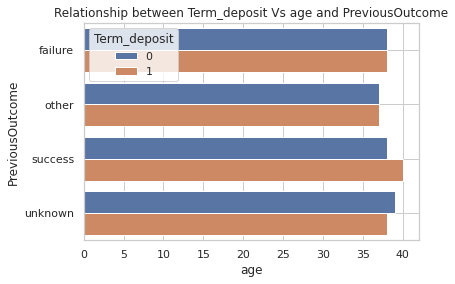

In [207]:
# sns.barplot(x = 'age',
#             y = 'PreviousOutcome',
#             hue = 'Term_deposit',
#             data = bm1,
#             estimator = np.median,
#             ci = 0)

# plt.title("Relationship between Term_deposit Vs age and PreviousOutcome")
# plt.xlabel('age')
# plt.ylabel('PreviousOutcome')
# plt.grid(True)  
# # To show the plot
# plt.show()

**Explanation:**


---
The Barplot shows the relationsip between age and Previousoutcome where the category of failure and unknown is same to success ratio to the term_deposit


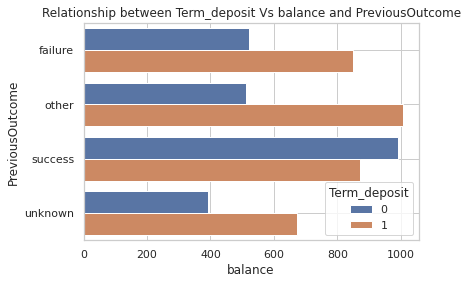

In [208]:
# sns.barplot(x = 'balance',
#             y = 'PreviousOutcome',
#             hue = 'Term_deposit',
#             data = bm1,
#             estimator = np.median,
#             ci = 0)

# plt.title("Relationship between Term_deposit Vs balance and PreviousOutcome")
# plt.xlabel('balance')
# plt.ylabel('PreviousOutcome')
# plt.grid(True)  
# # To show the plot
# plt.show()

**Explanation:**


---

The Success Outcome possiblity is directly proportional to the balance client is managing and at the same time failure rate is equal to the half of the other samples taken

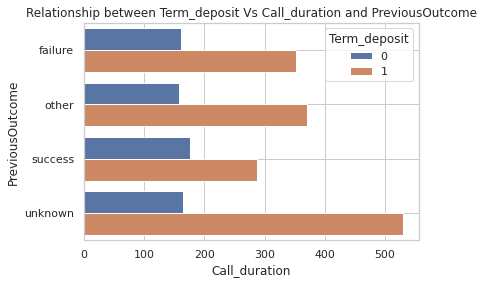

In [209]:
# sns.barplot(x = 'Call_duration',
#             y = 'PreviousOutcome',
#             hue = 'Term_deposit',
#             data = bm1,
#             estimator = np.median,
#             ci = 0)

# plt.title("Relationship between Term_deposit Vs Call_duration and PreviousOutcome")
# plt.xlabel('Call_duration')
# plt.ylabel('PreviousOutcome')
# plt.grid(True)  
# # To show the plot
# plt.show()

**Explanation:**


---

Bar plot depicts ratio of success possibility of previous Outcome campaign somewhere near to 4.5 minutes on an average

Treating Skewness

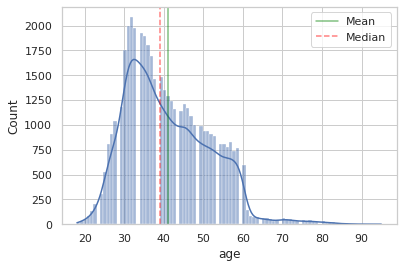

In [202]:
# sns.histplot(data = bm['age'], kde = True) # Histogram plot using seaborn
# plt.axvline(x=bm.age.mean(),color='green',alpha=0.5,label='Mean') # mean hue
# plt.axvline(x=bm.age.median(),c='red',ls='--',alpha=0.5,label='Median') # median hue
# plt.legend()

**Explanation:**


---

If we observe the curve, it is skewed towards right and mean is greater than median 

Selected Cube root transformation as log and square root transformations not plotting as normal distribution.

*Cube Root Transformation*

In [322]:
# Cube root transformation
bm1['age'] = np.cbrt(bm1['age'])

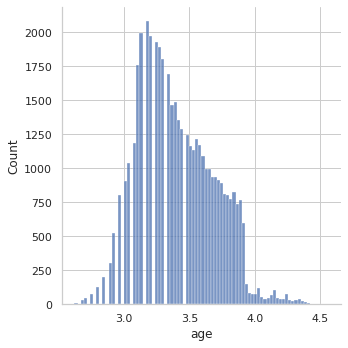

In [323]:
sns.displot(bm1['age']) # Density Plot for Age factor

**Explanation:**
In Cube root Transformation, age factor is symmetrical and normally distributed.

---



In [253]:
bm.columns

Index(['age', 'job', 'marital', 'education', 'Credit_Status', 'balance',
       'Housing_loan', 'Personal_loan', 'Communication_type', 'Contact_month',
       'Call_duration', 'PreviousOutcome', 'Term_deposit'],
      dtype='object')

In [324]:
# Cube root transformation
bm1['balance'] = np.cbrt(bm1['balance'])

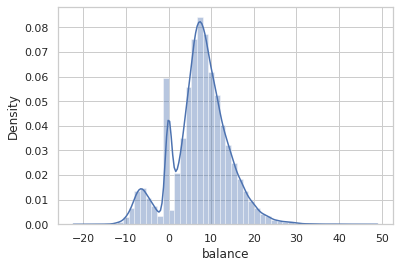

In [325]:
sns.distplot(bm1['balance'])

In [326]:
# # Cube root transformation
bm1['Call_duration'] = np.cbrt(bm1['Call_duration'])

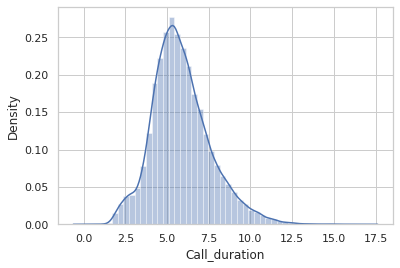

In [327]:
sns.distplot(bm1['Call_duration'])

In [328]:
bm1.skew()

age              0.286500
balance         -0.078187
Call_duration    0.640146
dtype: float64

In [329]:
bm1.corr() # to get correlation matrix of variables

,age,balance,Call_duration
age,1.000000,0.097507,-0.012827
balance,0.097507,1.000000,0.038115
Call_duration,-0.012827,0.038115,1.000000


In [331]:
bm1.dtypes

age                    float64
job                   category
marital               category
education             category
Credit_Status         category
balance                float64
Housing_loan          category
Personal_loan         category
Communication_type    category
Contact_month         category
Call_duration          float64
PreviousOutcome       category
Term_deposit          category
dtype: object

# Analysis

**Key Observations from Univariate Analysis From Categorical Columns**


---



We can identify Client who are **married** are contacted more by the bank and divorced Client have been contacted least followed by single category.


In **Job** Factor, we can observe that Client with blue-collar,management and technician jobs have been contacted more by the bank which are more than 6k


If we observe the plot, **secondary education** category is contacted most.


The **Clients who are last contacted** are majorly in the month of may followed by july and august. Bank has least contacted the clients in the december followed by march,september and october.



The Plot on **contact communication type** explains bank has contacted clients mostly through cellular communication and least contacted through telephone communication. Also, there are nearly 14k clients where bank is unable to reach customers.


The Plot on **outcome of the previous marketing campaign** contains 37K unknown values which is more imbalanced.

After Performing Multivariate Analysis with use of regression plot found Key Factors which will help to build effective marketing campaigns are
Age,
Balance,
Communication_type,
PreviousOutcome,
job,
education

# CONCLUSION

**Key Factors which will help to build effective marketing campaigns are:**


---


Age\
Communication_type\
education\
job\
married\
PreviousOutcome

In [342]:
# Downloading cleaned data
from google.colab import files

bm1.to_excel('mydata.xlsx', encoding = 'utf-8-sig') 
files.download('mydata.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ML Modeling

In [266]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [332]:
bm1.columns 

Index(['age', 'job', 'marital', 'education', 'Credit_Status', 'balance',
       'Housing_loan', 'Personal_loan', 'Communication_type', 'Contact_month',
       'Call_duration', 'PreviousOutcome', 'Term_deposit'],
      dtype='object')

In [334]:
bm1.nunique()

age                     77
job                     12
marital                  3
education                4
Credit_Status            2
balance               7168
Housing_loan             2
Personal_loan            2
Communication_type       3
Contact_month           12
Call_duration         1573
PreviousOutcome          4
Term_deposit             2
dtype: int64

In [335]:
bm1["Term_deposit"] = bm1["Term_deposit"].map({"yes": 1, "no": 0})
bm1["Credit_Status"] = bm1["Credit_Status"].map({"yes": 1, "no": 0})
bm1["Housing_loan"] = bm1["Housing_loan"].map({"yes": 1, "no": 0})
bm1["Personal_loan"] = bm1["Personal_loan"].map({"yes": 1, "no": 0})
bank_mrktng_sample = bm1[['age','Credit_Status','Housing_loan','Personal_loan','Term_deposit']]
y = bank_mrktng_sample["Term_deposit"].astype("int").values
X = bank_mrktng_sample.drop("Term_deposit", axis=1).values

In [336]:
scaled_X = StandardScaler().fit_transform(X)

In [337]:
scaled_X

array([[ 1.54012107, -0.13548989,  0.89391541, -0.43680347],
       [ 0.37297702, -0.13548989,  0.89391541, -0.43680347],
       [-0.73345213, -0.13548989,  0.89391541,  2.2893591 ],
       ...,
       [ 2.53165179, -0.13548989, -1.11867408, -0.43680347],
       [ 1.46343011, -0.13548989, -1.11867408, -0.43680347],
       [-0.30609177, -0.13548989, -1.11867408, -0.43680347]])

In [338]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.30)

In [339]:
model = LogisticRegression().fit(X_train,y_train)

In [340]:
prediction = model.predict(X_test)

In [341]:
accuracy_score(y_test,prediction)

0.8833677381303451

***End of Project***

